**Import library**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Load And Read Data**

In [17]:
df = pd.read_csv("Churn_Data.csv")

Menampilkan 5 data teratas dan ter akhir

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Mempelajari berbagai atribut data seperti bentuk (baris dan kolom), Kolom, tipe data

In [20]:
# menampilkan jumlah row dan column
df.shape

(7043, 21)

In [21]:
#menampilkan semua kolom yang ada
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [22]:
# menampilkan tipe dari semua kolom
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
# melihat statistik data kolom yang bertipe number(int)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- SeniorCitizen seharusnya bertipe kategorikal(String).
- Rata rata tenure(masa berlangganan) yaitu 32 bulan dan 75% nya dibawah 55 bulan.
- Rata rata MonthlyCharge(biaya bulanan) yaitu USD 64.76 perbulan dan 25% customers membayar lebih dari USD 89.85.


**Menganalisa Variable Target**

Churn
No     5174
Yes    1869
Name: count, dtype: int64


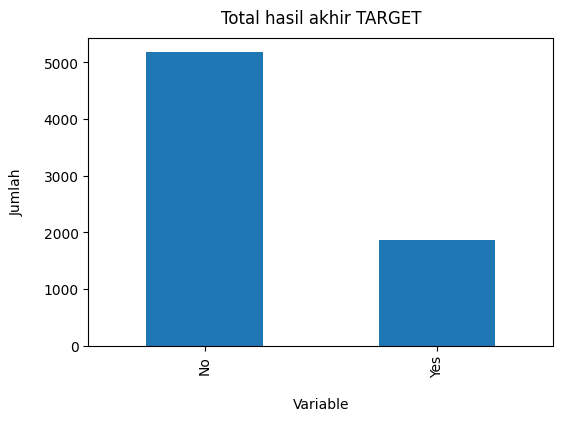

In [24]:
print(df['Churn'].value_counts())
df['Churn'].value_counts().plot(kind='bar', figsize=(6,4))
plt.xlabel("Variable", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Total hasil akhir TARGET", y=1.02);

In [25]:
print("Nilai Di Dalam Persen\n",100*df['Churn'].value_counts()/len(df['Churn']))


Nilai Di Dalam Persen
 Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


Berdasarkan data di atas, didapatkan bahwa pelanggan yang beralih(berhenti) lebih sedikit dibandingkan yang tetap, dengan rasio = 27:73

In [26]:
for predictor in df.drop(columns=['Churn','customerID','tenure','MonthlyCharges','TotalCharges']):
    print(f"--- Value Counts untuk: {predictor} ---")
    print(df[predictor].value_counts())
    print("\n")

--- Value Counts untuk: gender ---
gender
Male      3555
Female    3488
Name: count, dtype: int64


--- Value Counts untuk: SeniorCitizen ---
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


--- Value Counts untuk: Partner ---
Partner
No     3641
Yes    3402
Name: count, dtype: int64


--- Value Counts untuk: Dependents ---
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


--- Value Counts untuk: PhoneService ---
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


--- Value Counts untuk: MultipleLines ---
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


--- Value Counts untuk: InternetService ---
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


--- Value Counts untuk: OnlineSecurity ---
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


--- Value Count

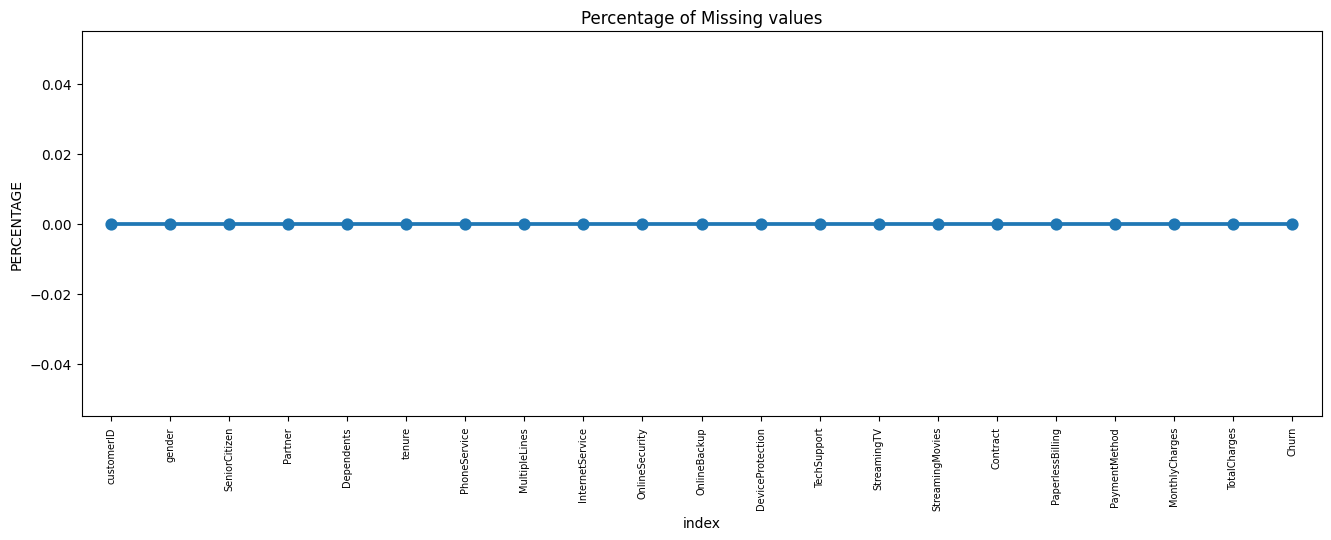

In [27]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

berdasarkan visualisasi di atas, sementara ini tidak ditemukannya missing value(data yang hilang).

## Cleaning data ##

In [28]:
dfcopy = df.copy()

In [29]:
dfcopy.TotalCharges = pd.to_numeric(dfcopy.TotalCharges, errors ='coerce')
dfcopy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

setelah merubah tipe data dari TotalCharge, didapatkannya ada missing value

In [30]:
dfcopy.loc[dfcopy ['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [31]:
dfcopy.dropna(how = 'any', inplace = True)


In [32]:
dfcopy.TotalCharges = pd.to_numeric(dfcopy.TotalCharges, errors ='coerce')
dfcopy.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
print(dfcopy['tenure'].max())

72


In [34]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

dfcopy['tenure_group'] = pd.cut(dfcopy.tenure, range(1, 80, 12), right=False, labels=labels)

In [35]:
dfcopy['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

**Menghapus Kolom Yang Tidak Dibutuhkan**

In [36]:
dfcopy.drop(columns = ['MultipleLines', 'customerID'], axis = 1, inplace = True)

## Data Exploration ##

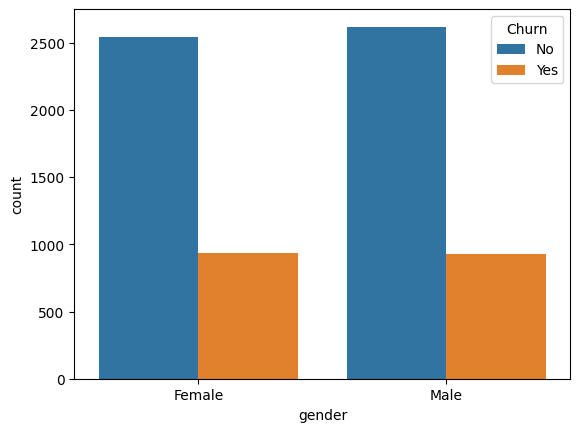

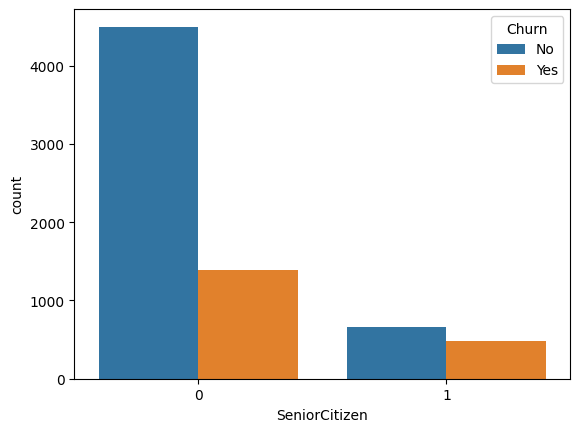

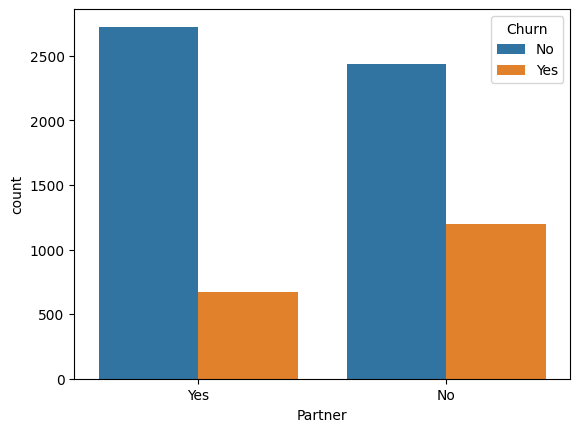

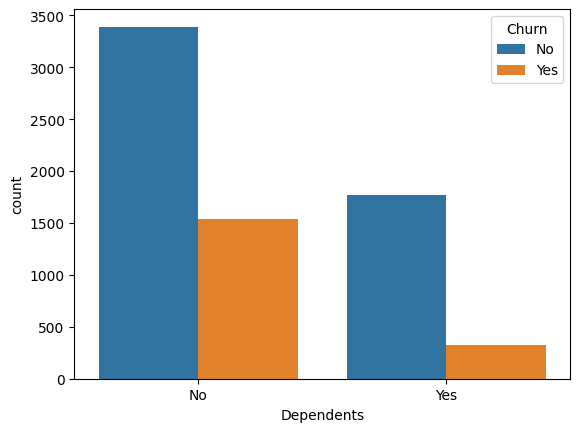

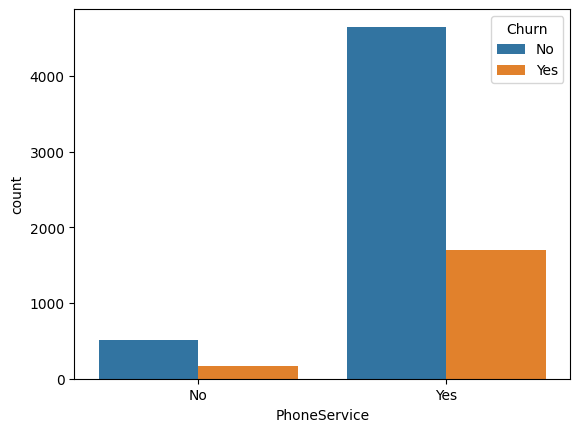

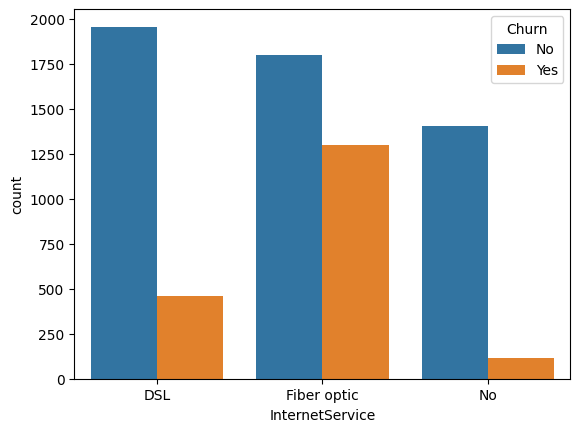

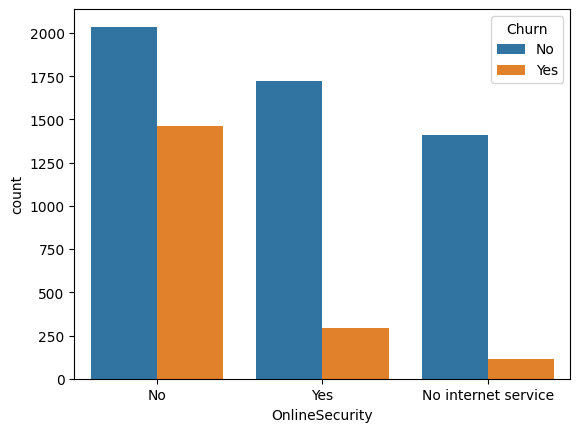

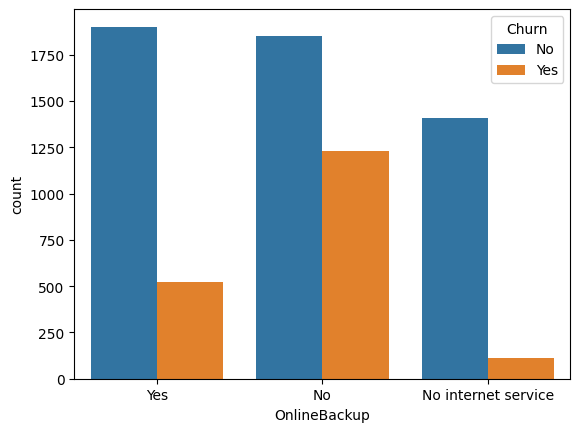

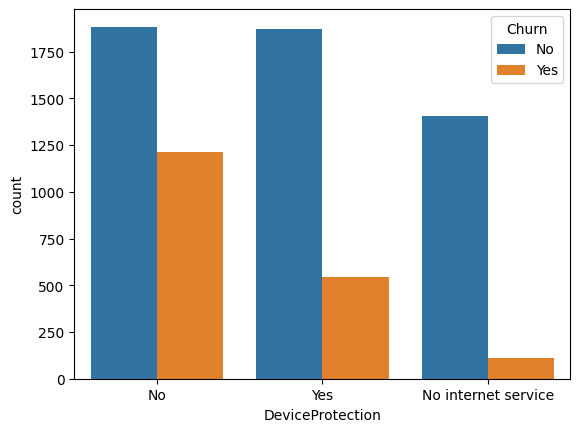

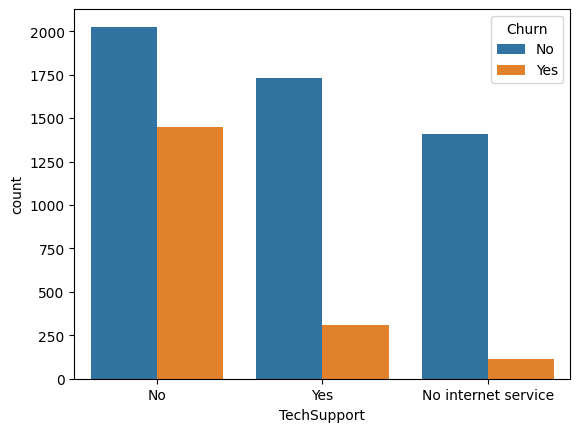

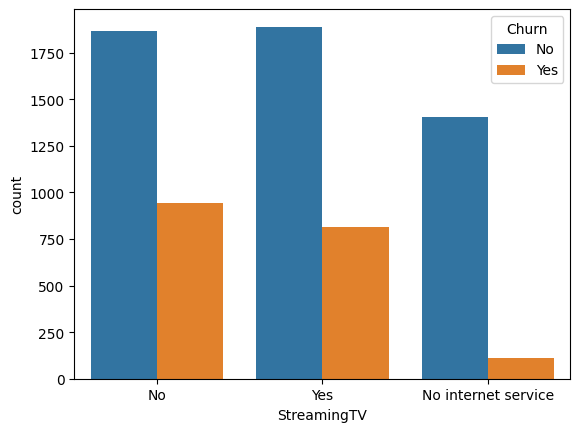

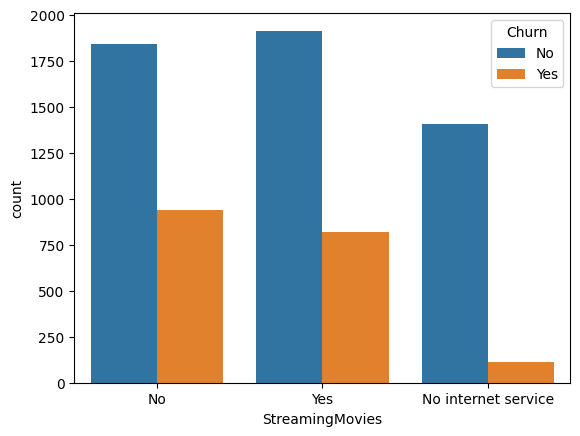

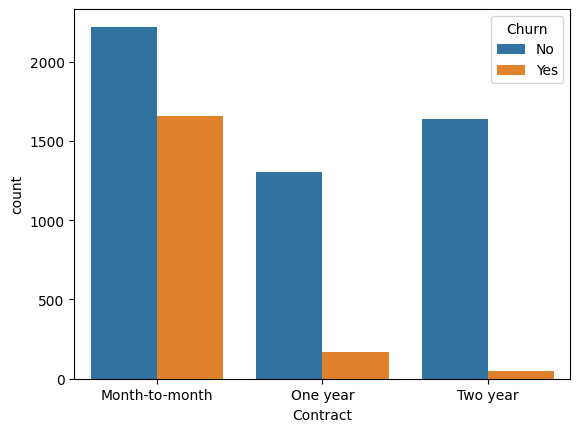

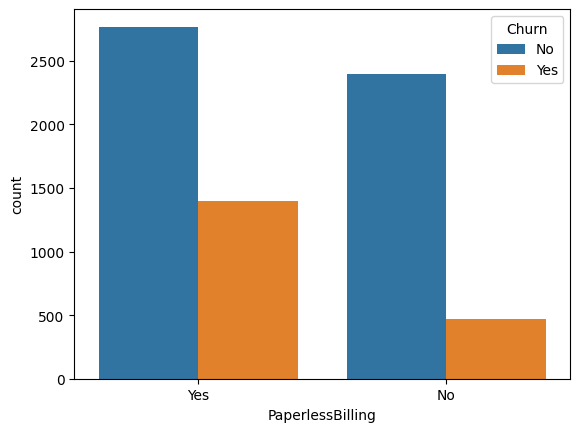

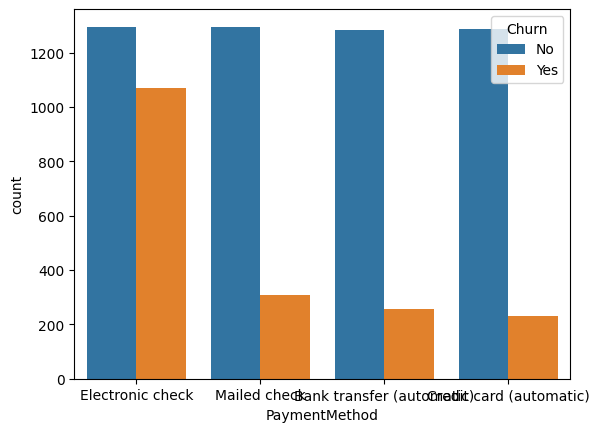

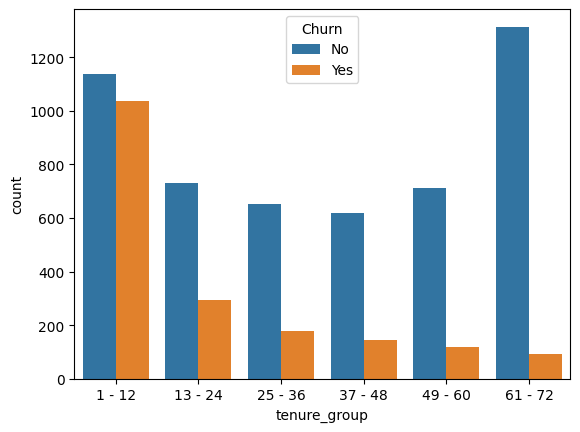

In [37]:
for i, predictor in enumerate(dfcopy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=dfcopy, x=predictor, hue='Churn')

mengkonfersi variable target 'Churn' ke dalam binari variable numerik seperti Yes=1 ; No = 0

In [38]:
dfcopy['Churn'] = np.where(dfcopy.Churn == 'Yes',1,0)

In [39]:
dfcopy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [40]:
df_dummies = pd.get_dummies(dfcopy)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


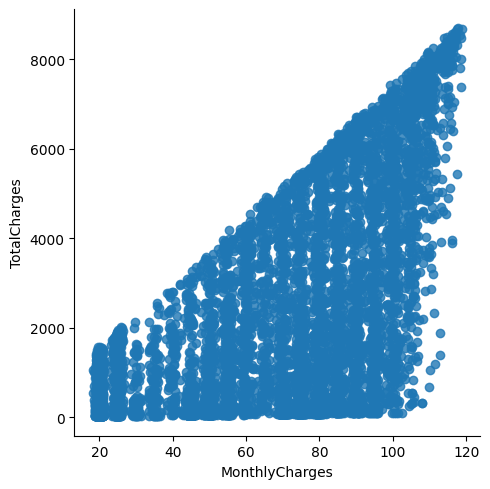

In [42]:
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

semakin lama masa berlangganan maka mempengaruhi naiknya total pembayaran - seperti yang diharapkan

C:\Users\HP\AppData\Local\Temp\ipykernel_13980\313319385.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
C:\Users\HP\AppData\Local\Temp\ipykernel_13980\313319385.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

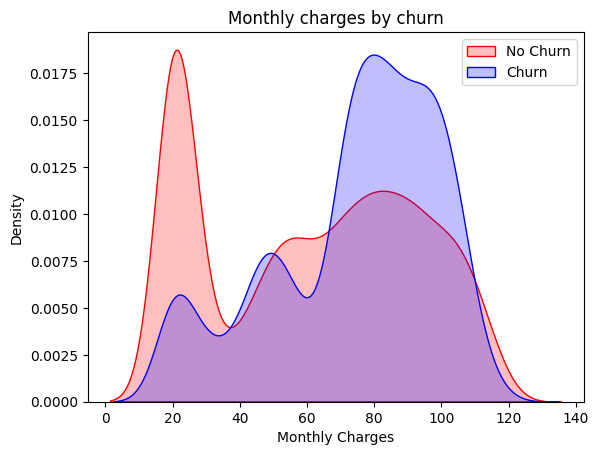

In [43]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')